# Loading function and libraries

In [1]:
!pip install lowess

  Created wheel for lowess: filename=lowess-1.0.2-cp36-none-any.whl size=6114 sha256=294098a1312a6c24912e9114df7bd0ece9d8add6594a8be66ed6cbf5d0488da9
  Stored in directory: /root/.cache/pip/wheels/32/45/c2/e70ca4ad60fb118d193cae63ca7a83bb5a443c1eba58e46672
Successfully built lowess


In [2]:
import numpy as np
import pandas as pd 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import math
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from scipy.stats import entropy
from tqdm.notebook import tqdm, trange
import statsmodels.api as sm
import statistics 
from scipy.stats import gaussian_kde
import lowess as lo

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
total_playcount = np.load("/content/drive/My Drive/MSc Statistics/total_playcount.npy")
gini_index = np.load("/content/drive/My Drive/MSc Statistics/gini_index.npy")
hill_no = np.load("/content/drive/My Drive/MSc Statistics/hill_no.npy")
distinct_songs = np.load("/content/drive/My Drive/MSc Statistics/distinct_songs.npy", allow_pickle=True)
distinct_artists = np.load("/content/drive/My Drive/MSc Statistics/distinct_artists.npy")
shannon = np.load("/content/drive/My Drive/MSc Statistics/shannon-artist.npy")
pop_score = np.load("/content/drive/My Drive/MSc Statistics/pop_score.npy")
relative = np.load("/content/drive/My Drive/MSc Statistics/KL-artist.npy")
gini_index = np.load("/content/drive/My Drive/MSc Statistics/gini-artist.npy")
hill_no = np.load("/content/drive/My Drive/MSc Statistics/hill-artist.npy")
toy_triplets = np.load("/content/drive/My Drive/MSc Statistics/toy_triplets.npy", allow_pickle=True)
toy_triplets = pd.DataFrame(toy_triplets, columns = ["UserId", "SongId", "Count", "TrackId", "Artist", "Song" ])

In [ ]:
toy_triplets.describe()

,UserId,SongId,Count,TrackId,Artist,Song
count,472358,472358,472358,472358,472358,472358
unique,10000,105296,203,105296,21360,91260
top,dc61155e20289dcd089ac40181cb88f042404602,SOFRQTD12A81C233C0,1,TRDMBIJ128F4290431,Coldplay,Sehr kosmisch
freq,704,1045,280978,1045,4053,1045


In [ ]:
def plot(p,q, xlab, ylab, filename, frac=0.2):
  # Plots scatterplot with mass gradient and LOwESS
  # p - x variable
  # q - y variable

  # stacking data for the density gradient
  xy = np.vstack([p,q])
  # calling 
  z = gaussian_kde(xy)(xy)

  idx = z.argsort()
  x, y, z = p[idx], q[idx], z[idx]

  df = pd.DataFrame({'x': x, 'Raw': y})
  df["pred"] = lo.lowess(df["Raw"], df["x"], frac, 2)

  # sorting so that could plot a somehow monotonic line
  sorted_index = np.argsort(df["Raw"])
  X_sort = df["Raw"][sorted_index]
  y_sort = df["pred"][sorted_index]  

  fig, ax = plt.subplots()
  # main scatter
  ax.scatter(df["Raw"], df["x"], c=z, s=50, edgecolor='', cmap=plt.cm.summer)
  # LOWESS 
  ax.plot(X_sort, y_sort, "r", label="LOWESS")
  leg = ax.legend(loc=7)
  plt.xlabel(xlab)
  plt.ylabel(ylab)
  plt.savefig(filename, format = "png", transparent = True)
  plt.show()

In [ ]:
def plot_hill(p,q, xlab, ylab, filename):
  # Plots scatterplot with mass gradient and LOESS
  # p - x variable
  # q - y variable
  xy = np.vstack([p,q])
  z = gaussian_kde(xy)(xy)

  idx = z.argsort()
  x, y, z = p[idx], q[idx], z[idx]

  m, b = np.polyfit(p, q, 1)

  fig, ax = plt.subplots()
  ax.scatter(x, y, c=z, s=50, edgecolor='', cmap=plt.cm.summer)
  ax.plot(p, m*p + b, label="OLS", color="r")
  leg = ax.legend(loc=1)
  plt.xlabel(xlab)
  plt.ylabel(ylab)
  plt.savefig(filename, format = "png", transparent = True)
  plt.show()

# Shannon entropy

In [ ]:
def entropy_me(p):
    c = []
    for i in p:
        if i == 0:
            b = 0
        else:
            b = -i*math.log2(i)
        c.append(b)
    d = sum(c)
    return d

In [ ]:
users = toy_triplets["UserId"].unique().tolist()

In [ ]:
users[100]

'd54b1df567fbc4d8a4be16471e6024ae6524bbcf'

In [ ]:
# getting a list of unique UserIds
users = toy_triplets["UserId"].unique().tolist()

# calculating the Shannon entropy for each user separatelly and stacking
# everything into the list "shannon"
shannon = []
for i in tqdm(users):
  un_art = toy_triplets[toy_triplets["UserId"]==i].groupby(["Artist"])["Count"].sum()
  p = un_art/np.sum(toy_triplets["Count"][toy_triplets["UserId"]==i])
  #a = entropy_me(b)
  a = entropy(p, base = 2)
  shannon.append(a)

In [ ]:
np.save("shannon-artist", shannon)

In [ ]:
pd.DataFrame(shannon).describe()

,0
count,10000.000000
mean,3.690172
std,1.153100
min,0.000000
25%,2.997543
50%,3.640224
75%,4.414576
max,7.873588


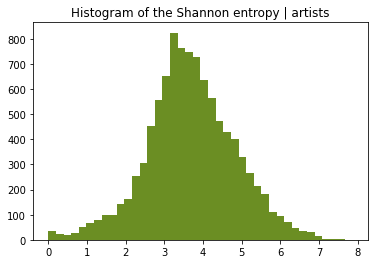

In [ ]:
plt.hist(shannon, bins=40,
                          color = "olivedrab", density = False)
plt.title("Histogram of the Shannon entropy | artists")
plt.savefig("shannon_hist_art", format = "png", transparent = True)

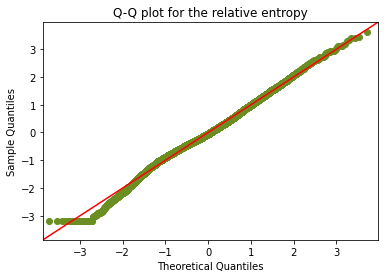

In [ ]:
fig = sm.qqplot(np.array(shannon), fit=True, line='45', color = "olivedrab")
plt.title("Q-Q plot for the relative entropy")
plt.savefig("QQ_shannon", format = "png", transparent = True)
plt.show()

In [ ]:
low = np.mean(relative) - 1.96*np.std(relative)
high = np.mean(relative) + 1.96*np.std(relative)
print(low, high)

5.04655138944929 11.743908910208448


# KL divergence

In [ ]:
# defining Q. 
big_list = []
for u in tqdm(users):
  # How many distinct artist a user is listening to
  art_unique_user = toy_triplets["Artist"][toy_triplets["UserId"]==u].unique().tolist()
  # stacking all of these users together
  big_list = np.hstack([big_list, np.array(art_unique_user)])

In [ ]:
np.save("Big_list", big_list)

In [ ]:
# the total number of time artist was mentioned is q_j
sum_art = pd.DataFrame(big_list, columns=["Artists"]).groupby(["Artists"]).size().to_frame()

In [ ]:
# cleaning for better representation
sum_art["Artist"] = sum_art.index
sum_art.columns = ["Count_q", "Artist"]
sum_art.index.names = ["Index"]

In [ ]:
sum_art

,Count_q,Artist
Index,,
!!!,0.000079,!!!
& And Oceans,0.000007,& And Oceans
'68 Comeback,0.000007,'68 Comeback
'N Sync/Phil Collins,0.000045,'N Sync/Phil Collins
'Til Tuesday,0.000021,'Til Tuesday
...,...,...
Íon,0.000007,Íon
Ólafur Arnalds,0.000024,Ólafur Arnalds
Órla Fallon,0.000003,Órla Fallon


In [ ]:
pd.DataFrame(big_list, columns=["Artists"]).groupby(["Artists"]).size().to_frame()

,0
Artists,
!!!,23
& And Oceans,2
'68 Comeback,2
'N Sync/Phil Collins,13
'Til Tuesday,6
...,...
Íon,2
Ólafur Arnalds,7
Órla Fallon,1


In [ ]:
sum_art.sort_values(by = "Count_q", ascending=False)[:10].to_latex()

'\\begin{tabular}{lrl}\n\\toprule\n{} &   Count\\_q &                  Artist \\\\\nIndex                  &           &                         \\\\\n\\midrule\nKings Of Leon          &  0.004684 &           Kings Of Leon \\\\\nColdplay               &  0.004316 &                Coldplay \\\\\nHarmonia               &  0.003610 &                Harmonia \\\\\nBjörk                  &  0.003534 &                   Björk \\\\\nFlorence + The Machine &  0.003503 &  Florence + The Machine \\\\\nOneRepublic            &  0.003328 &             OneRepublic \\\\\nTrain                  &  0.003287 &                   Train \\\\\nThe Killers            &  0.003108 &             The Killers \\\\\nRadiohead              &  0.002825 &               Radiohead \\\\\nDwight Yoakam          &  0.002760 &           Dwight Yoakam \\\\\n\\bottomrule\n\\end{tabular}\n'

In [ ]:
# getting q_j as probability
Q_joint_art = sum_art
Q_joint_art["Count_q"] = Q_joint_art["Count_q"]/np.sum(Q_joint_art["Count_q"])

In [ ]:
Q_joint_art.sort_values(by = "Count_q", ascending=False)[:10]

,Count_q,Artist
Index,,
Kings Of Leon,0.004684,Kings Of Leon
Coldplay,0.004316,Coldplay
Harmonia,0.003610,Harmonia
Björk,0.003534,Björk
Florence + The Machine,0.003503,Florence + The Machine
OneRepublic,0.003328,OneRepublic
Train,0.003287,Train
The Killers,0.003108,The Killers
Radiohead,0.002825,Radiohead


In [ ]:
# Kullback-Leibner divergence function
# Must use it since the inbuilt "entrpy" command normalizes q by default
def KL(p,q):
    c = []
    for i, j in zip(p,q):
        if i == 0:
            b = 0
        else:
            b = i*math.log2(i/j)
        c.append(b)
    d = sum(c)
    return d

In [ ]:
# list users from above (Shannon entropy)
relative = []
for u in tqdm(users):
  # subset the Count and SongID data for each user
  p = toy_triplets[toy_triplets["UserId"] == u]
  # summing the counts of distinct songs by the same artist and getting p_ij
  a = p.groupby(["Artist"])["Count"].sum()/np.sum(p["Count"])
  # merge with Q so that the absent artists would disappear (p_ij = 0 contributes
  # 0 to KL, hence it is equivalent to discard it a priori)
  mid = pd.merge(left = a, right = Q_joint_art, left_on = "Artist", 
                 right_on = "Artist")
  # KL function aggregate
  relative.append(KL(mid["Count"], mid["Count_q"]))

In [ ]:
np.save("KL-artist", relative)

In [ ]:
np.save("Q-artist", Q_joint_art)

In [ ]:
pd.DataFrame(relative).describe()

,0
count,10000.000000
mean,8.395230
std,1.708595
min,2.656501
25%,7.236087
50%,8.320692
75%,9.448856
max,17.148521


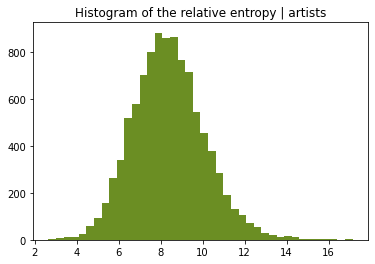

In [ ]:
plt.hist(relative, bins = 40,                
         color = "olivedrab", density = False)
plt.title("Histogram of the relative entropy | artists")
plt.savefig("KL_hist_art", format = "png", transparent = True)

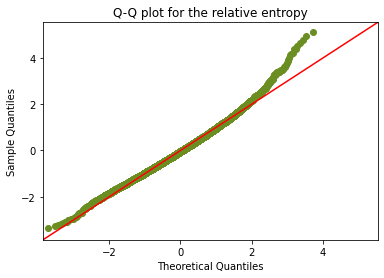

In [ ]:
fig = sm.qqplot(np.array(relative), fit=True, line='45', color = "olivedrab")
plt.title("Q-Q plot for the relative entropy")
#plt.savefig("QQ", format = "png", transparent = True)
plt.show()

# Gini index

In [ ]:
# Gini function
def gini(p):
    c = []
    for i in p:
        b = i**2
        c.append(b)
    d = 1 - sum(c)    
    return d

In [ ]:
# calculating the Gini index  for each user separatelly and stacking
# everything into the list "shannon"
gini_index = []
for i in tqdm(users):
  un_art = toy_triplets[toy_triplets["UserId"]==i].groupby(["Artist"])["Count"].sum()
  p = un_art/np.sum(toy_triplets["Count"][toy_triplets["UserId"]==i])
  a = gini(p)
  gini_index.append(a)

In [ ]:
np.save("gini-artist", gini_index)

In [ ]:
pd.DataFrame(gini_index).describe()

,0
count,10000.000000
mean,0.853818
std,0.137624
min,0.000000
25%,0.826623
50%,0.892800
75%,0.934140
max,0.993263


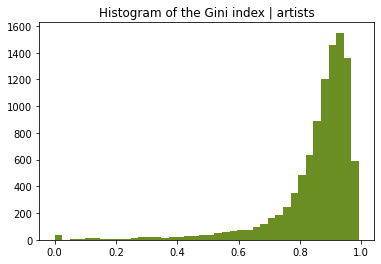

In [ ]:
plt.hist(gini_index, bins=40,
                          color = "olivedrab", density = False)
plt.title("Histogram of the Gini index | artists")
plt.savefig("gini_hist_art", format = "png", transparent = True)

In [ ]:
np.where(np.array(gini_index)==0)

(array([ 163,  604,  835,  936, 1200, 1691, 1764, 2013, 2732, 2818, 3368,
        4603, 4934, 5803, 6076, 6359, 6417, 6425, 6763, 7323, 7455, 7458,
        8144, 8206, 8316, 8487, 8711, 9081, 9221, 9279, 9590, 9735, 9804]),)

In [ ]:
toy_triplets[toy_triplets["UserId"]==users[163]]

,UserId,SongId,Count,TrackId,Artist,Song
7393,05a3451ef5981887272bb259fe1662697d5297f0,SOMEAMC12A8C13C53A,1,TRNMAED128F426AA9A,Meshuggah,Autonomy Lost
7394,05a3451ef5981887272bb259fe1662697d5297f0,SODLBBW12A6D4F932B,1,TRUYVPM128F14A14F2,Meshuggah,Corridor of chameleons
7395,05a3451ef5981887272bb259fe1662697d5297f0,SOAFOYS12A58A7DB75,1,TRODNKM128F42B3705,Meshuggah,Elastic
7396,05a3451ef5981887272bb259fe1662697d5297f0,SOEKLPS12A81C23246,1,TRTPRBC128F424C416,Meshuggah,Internal evidence
7397,05a3451ef5981887272bb259fe1662697d5297f0,SOFTDAG12A8C139A3F,1,TRNYPCA128F4292F89,Meshuggah,Personate Non Gratae
7398,05a3451ef5981887272bb259fe1662697d5297f0,SOVRRLT12A8C139BC5,1,TRBSUTH128F426AAA5,Meshuggah,Entrapment
7399,05a3451ef5981887272bb259fe1662697d5297f0,SOVYOXT12A8C13C57A,1,TRFIYGT128F426AAAA,Meshuggah,In Death - Is Life
7400,05a3451ef5981887272bb259fe1662697d5297f0,SOYANUT12A81C2321C,1,TRZIDTV128F424C3F5,Meshuggah,Cadaverous mastication
7401,05a3451ef5981887272bb259fe1662697d5297f0,SOOFKQE12A8C13299A,1,TRLSHUM128F4291492,Meshuggah,Abnegating cecity
7402,05a3451ef5981887272bb259fe1662697d5297f0,SOXBEJI12A6D4F932E,1,TREXTIY128F427FBA2,Meshuggah,Sane


# Hill number

In [ ]:
# Hill number function
def hill(p,q):
    c =[]
    for i in p:
        b = i**q
        c.append(b)
    d = sum(c)**(1/(1-q))   
    return d

In [ ]:
# calculating the Hill number for each user separatelly and stacking
# everything into the list "hill_no"
hill_no= []
for i in tqdm(users):
  un_art = toy_triplets[toy_triplets["UserId"]==i].groupby(["Artist"])["Count"].sum()
  p = un_art/np.sum(toy_triplets["Count"][toy_triplets["UserId"]==i])
  a = hill(p, 3)
  hill_no.append(a)

In [ ]:
np.save("hill-artist", hill_no)

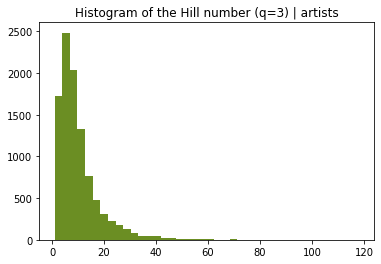

In [ ]:
plt.hist(hill_no, bins=40,                 
         color = "olivedrab", density = False)
plt.title("Histogram of the Hill number (q=3) | artists")
plt.savefig("Hill_hist_art", format = "png", transparent = True)

In [ ]:
pd.DataFrame(hill_no).describe()

,0
count,10000.000000
mean,10.248795
std,8.724092
min,1.000000
25%,4.822216
50%,7.902655
75%,12.534342
max,118.131390


# Total user activity


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


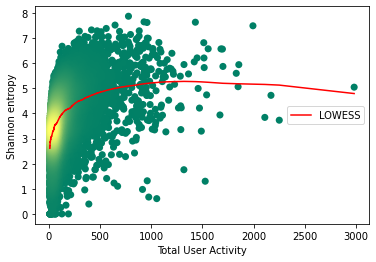

In [ ]:
plot(shannon, total_playcount, "Total User Activity", "Shannon entropy", "art_shannon_playcount")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


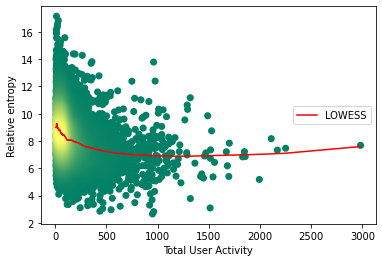

In [ ]:
plot(relative, total_playcount, "Total User Activity", "Relative entropy", "art_relative_playcount")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


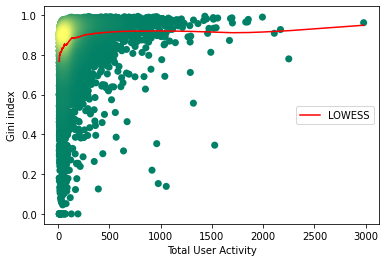

In [ ]:
plot(gini_index, total_playcount, "Total User Activity", "Gini index", "art_gini_playcount")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


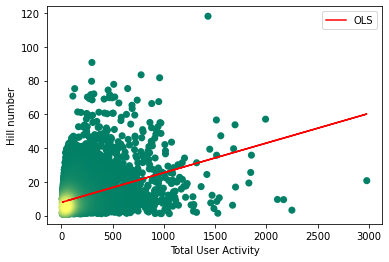

In [ ]:
plot_hill(total_playcount, hill_no, "Total User Activity", "Hill number", "art_hill_playcount")

# Coverage: songs


# New Section

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


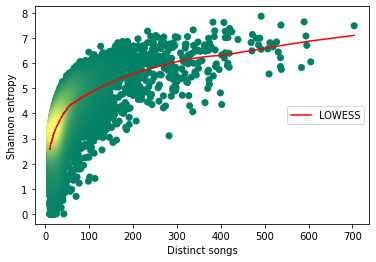

In [ ]:
plot(shannon, distinct_songs[:,1].astype('float'), "Distinct songs", "Shannon entropy", "art_shannon_songs")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


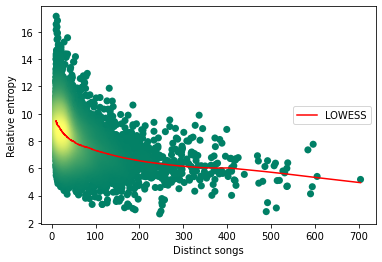

In [ ]:
plot(relative, distinct_songs[:,1].astype('float'), "Distinct songs", "Relative entropy", "art_relative_songs")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


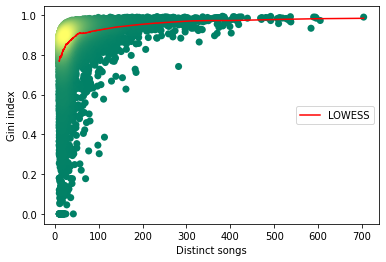

In [ ]:
plot(gini_index, distinct_songs[:,1].astype('float'), "Distinct songs", "Gini index", "art_gini_songs")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


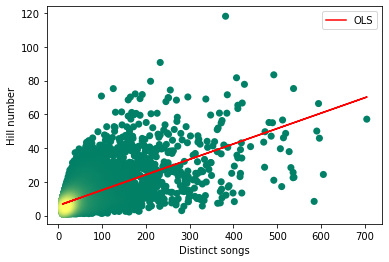

In [ ]:
plot_hill(distinct_songs[:,1].astype('float'), hill_no, "Distinct songs", "Hill number", "art_hill_songs")

# Coverage: artists

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


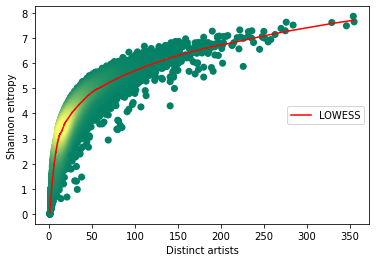

In [ ]:
plot(shannon, distinct_artists, "Distinct artists", "Shannon entropy", "art_shannon_art")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


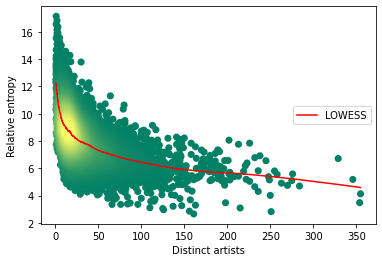

In [ ]:
plot(relative, distinct_artists, "Distinct artists", "Relative entropy", "art_relative_art")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


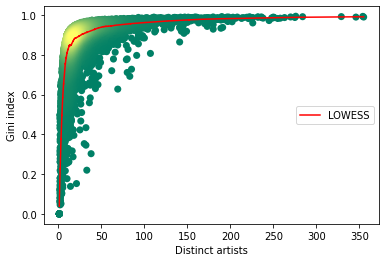

In [ ]:
plot(gini_index, distinct_artists, "Distinct artists", "Gini index", "art_gini_art")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


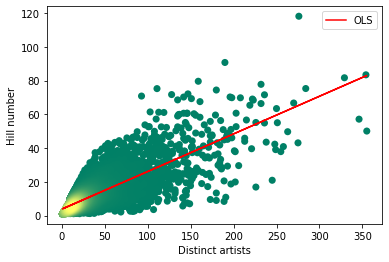

In [ ]:
plot_hill(distinct_artists, hill_no, "Distinct artists", "Hill number", "art_hill_art")

# Popularity


# New Section

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


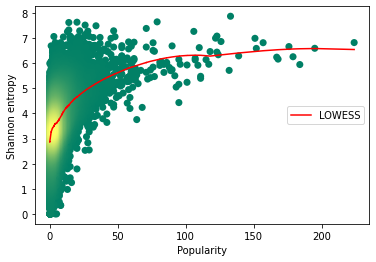

In [ ]:
plot(shannon, pop_score, "Popularity", "Shannon entropy", "art_shannon_pop", frac=0.3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


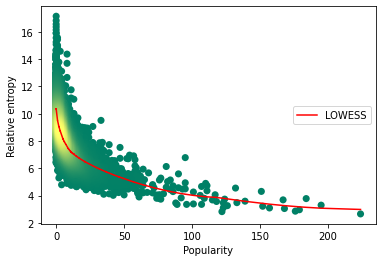

In [ ]:
plot(relative, pop_score, "Popularity", "Relative entropy", "art_relative_pop", frac = 0.3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


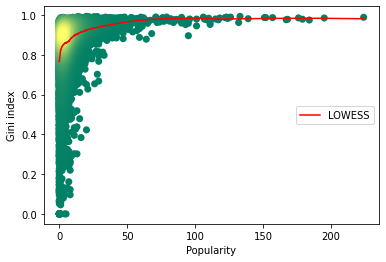

In [ ]:
plot(gini_index, pop_score, "Popularity", "Gini index", "art_gini_pop", frac = 0.3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


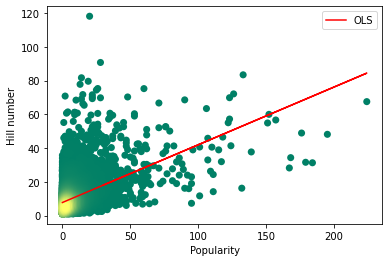

In [ ]:
plot_hill(pop_score, hill_no, "Popularity", "Hill number", "art_hill_pop")

# Concordance

In [ ]:
import scipy.stats as stats

print(stats.kendalltau(shannon, relative),
      stats.kendalltau(shannon,hill_no),
      stats.kendalltau(shannon, gini_index),
      stats.kendalltau(relative, gini_index),
      stats.kendalltau(relative, hill_no),
      stats.kendalltau(gini_index, hill_no))

KendalltauResult(correlation=-0.43092104854763885, pvalue=0.0) KendalltauResult(correlation=0.7684458826371109, pvalue=0.0) KendalltauResult(correlation=0.8423360196813174, pvalue=0.0) KendalltauResult(correlation=-0.41819137718457455, pvalue=0.0) KendalltauResult(correlation=-0.40140901329835427, pvalue=0.0) KendalltauResult(correlation=0.92273730355223, pvalue=0.0)


In [ ]:
shannon_r = stats.rankdata(shannon)
relative_r = 10000 -stats.rankdata(relative)
hill_no_r = stats.rankdata(hill_no)
gini_r = stats.rankdata(gini_index)

In [ ]:
diff_a = shannon_r-relative_r
diff_b = shannon_r-hill_no_r
diff_c = hill_no_r - relative_r
diff_d = shannon_r - gini_r

In [ ]:
diffs = np.vstack((diff_a, diff_b))
diffs = np.vstack((diffs, diff_c))
diffs = np.vstack((diffs, diff_d))

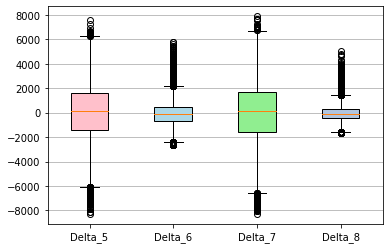

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1)
labels = ["Delta_5", "Delta_6", "Delta_7", "Delta_8"]

bplot = axes.boxplot(np.transpose(diffs),
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
# lots of negative values meaning shannon<relative. 

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen', "lightsteelblue"]

for patch, color in zip(bplot['boxes'], colors):
      patch.set_facecolor(color)

# adding horizontal grid lines

axes.yaxis.grid(True)

plt.savefig("box_plots_2", format = "png", transparent = True, dpi=500)
plt.show()

In [ ]:
pd.DataFrame(diff_a).describe()

,0
count,10000.00000
mean,1.00000
std,2562.65414
min,-8288.00000
25%,-1450.50000
50%,139.00000
75%,1641.25000
max,7562.00000


In [ ]:
pd.DataFrame(diff_c).describe()

,0
count,10000.000000
mean,1.000000
std,2680.063206
min,-8248.000000
25%,-1604.250000
50%,106.000000
75%,1720.625000
max,7888.000000


In [ ]:
pd.DataFrame(diff_b).describe()

,0
count,10000.000000
mean,0.000000
std,1140.092405
min,-2623.000000
25%,-675.125000
50%,-76.750000
75%,466.250000
max,5828.000000


In [ ]:
loc = np.where(diff_a==-8288)
print(loc)

(array([5703]),)


In [ ]:
loc = np.where(diff_c==-8248)
print(loc)

(array([3075]),)


In [ ]:
loc = np.where(diff_b==5828)
print(loc)

(array([8536]),)


In [ ]:
print(hill_no_r[loc], shannon_r[loc], 
      hill_no[loc], shannon[loc])

[2032.] [7860.] [4.28764756] [4.57910974]


In [ ]:
print(total_playcount[loc], distinct_songs[loc,1], distinct_artists[loc], pop_score[loc])

[201.] [[137]] [79] [8]


In [ ]:
toy_triplets[["Count", "Artist", "Song"]][toy_triplets["UserId"]==users[8536]]

,Count,Artist,Song
401837,1,Harmonia,Sehr kosmisch
401838,1,Counting Crows,Mr. Jones
401839,1,Björk,Undo
401840,1,Florence + The Machine,Dog Days Are Over (Radio Edit)
401841,1,Dwight Yoakam,You're The One
...,...,...,...
401969,1,Rubén Blades,La Ruta
401970,2,Natalie Cole,Starting Over Again
401971,1,Juanes,Ficcion
401972,2,Natalie Cole,Inseparable


In [ ]:
toy_triplets[["Count", "Artist", "Song"]][toy_triplets["UserId"]==users[8536]].groupby(["Artist"]).sum().sort_values(by=["Count"])

,Count,Song
Artist,,
Adriana Calcanhotto,1,Music/Impressive Instant
John Brown's Body,1,Poor Man's Prayer
Jorge Alfano,1,Rivers of Zimbabwe (Album Version)
Kanye West,1,Street Lights
Limp Bizkit,1,Rollin' (Air Raid Vehicle)
MGMT,1,Brian Eno
Metro Area,1,Caught Up
Modest Mouse,1,Dance Hall
Nathan Fake,1,The Sky Was Pink (Holden Remix)


# Uniqueness

In [6]:
print(len(np.unique(shannon))/len(shannon), len(np.unique(relative))/len(relative), len(np.unique(gini_index))/len(gini_index), 
      len(np.unique(hill_no))/len(hill_no))

0.928 0.9996 0.8052 0.9106


In [7]:
len(np.unique(relative))

9996